# Práctica Modelos Regresión Lineal

Es frecuente encontrar que existe una relación entre dos (o más) variables.

Uno puede pensar a los modelos de regresión lineal (y, en general, a la mayoría de _modelos estadísticos_) de dos formas distintas.

1. Como una forma de **aproximar** el verdadero modelo  de la realidad (desconocido).
Reconociendo que muy probablemente el modelo estadístico que uno propone será distinto al modelo de la realidad (error de especificación)

1. **Suponer que el modelo especificado es el correcto** (ie, que la realidad es lineal), e intentar inferir/estimar lo mejor posible ese modelo.

[One Model to rule them all](https://www.youtube.com/watch?v=Nz8ssH7LiB0)

En algunos casos cometer un error de especificación no es particularmente importante. 

Por ejemplo, nosotros podemos  
- asumir $X \sim N(\mu, \sigma)$   
- cuando $X \sim Bi(n,p)$, en realidad

En este caso estamos cometiendo un error de especificación: asumimos un modelo cuando el correcto es otro.  

Ahora, si nuestro objetivo no es estimar algún *parámetro* de la distribución, sino algún *momento*, quizás incurrir en un error de especificación no sea tan grave. Por ejemplo, el TCL nos garantiza que la media muestral es un estimador consistente de la media poblacional con independencia de la distribución subyacente de la VA que estamos analizando (bajo condiciones suficientemente generales).

Ahora, si nos interesa es estimar un parámetro, la cosa es bien distinta.

## Regresión lineal

La *regresión lineal* es una técnica utilizada para modelar la relación entre una variable dependiente $Y$ y una o más variables independientes $X$. En el caso de la regresión lineal simple, consideramos una única variable independiente y asumimos que la curva de ajuste es una función lineal (más técnicamente, una transformación afín). El modelo se expresa como

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
$$

donde:
* $y_i$ es la variable dependiente (respuesta) para la observación $i$
* $x_i$ es la variable independiente (regresora) para la observación $i$
* $\beta_o$ es el intercepto del modelo,
* $\beta_1$ es la pendiente del modelo,
* $\varepsilon_i$ es el término de error o perturbación aleatoria para la observación $i$

Al modelo poblacional (que asumimos como el verdadero proceso generador de los datos) tiene su correlato muestral

$$
y_i = \hat\beta_0 + \hat\beta_1 x_i + \hat u_i = \hat{y}_i + \hat{u}_i
$$

donde:
* $\hat\beta_0$ es el estimador del intercepto del modelo,
* $\beta_1$ es el estimador de la pendiente del modelo,
* $\hat u_i$ es residuo de la observación $i$
* $\hat y_i$ es la predicción para la observación $i$


### Pregunta: ¿cuál es la interpretación de $\hat\beta_1$ ?


### Mínimos Cuadrados Ordinarios
Uno de lo *métodos de estimación* para el MRL es de *minimizar la suma de cuadrados de los residuos* ($SCR$ ó $RSS$). Es decir, el programa es encontrar

$$
 \hat\beta_0 , \hat\beta_1= \underset{\hat\beta_0, \hat\beta_1}{\text{argmin}} \sum_{i=1}^{n} \hat{u}_i^2 = \underset{\hat\beta_0, \hat\beta_1}{\text{argmin}} \sum_{i=1}^{n} (y_i - \hat\beta_0 - \hat\beta_1 x_i)^2
$$

Para encontrar los valores de $\beta_0$ y $\beta_1$ que minimizan la SCR (RSS), tomamos derivadas parciales respecto a $\hat\beta_0$ y $\hat\beta_1$, y las igualamos a cero. Esto nos da un sistema de ecuaciones conocido como las **ecuaciones normales**

1. Primer paso: Derivada respecto a $\hat\beta_0$

$$\frac{\partial SCR}{\partial\hat\beta_0}= -2 \sum_{i=1}^{n} (y_i - \hat\beta_0 - \hat\beta_1 x_i) = 0  $$


$$\sum_{i=1}^{n} y_i = n\hat\beta_0 + \hat\beta_1 \sum_{i=1}^{n} x_i  $$

$$\hat\beta_0 = \bar y_n -\hat\beta_1 \bar x_n $$
$$\bar y_n  =  \hat\beta_0 +\hat\beta_1 \bar x_n $$

Esta es la primera ecuación normal (*el modelo de regresión pasa por la media muestral de todas las variables*)

2. Segundo paso: Derivada respecto a $\hat\beta_1$

$$\frac{\partial SCR}{\partial\hat\beta_1}= -2 \sum_{i=1}^{n} x_i(y_i - \hat\beta_0 - \hat\beta_1 x_i) = 0  $$

$$\sum_{i=1}^{n} x_i y_i = \hat\beta_0 \sum_{i=1}^{n} x_i + \hat\beta_1 \sum_{i=1}^{n}x_i^2 = 0  $$

Esta es la segunda ecuación normal. Sustituyendo la primera en la segunda y definiendo $S_{xy} := \frac{1}{n} \sum_{i=1}^{n}  {(x_i - \bar x)(y_i - \bar y)}=\frac{1}{n} \sum_{i=1}^{n}x_i y_i - \bar x \bar y $ (la covarianza muestral) tenemos


$$\sum_{i=1}^{n} x_i y_i = (\bar y_n -\hat\beta_1 \bar x_n) \sum_{i=1}^{n} x_i + \hat\beta_1 \sum_{i=1}^{n}x_i^2 = 0  $$

$$ \sum_{i=1}^{n} (x_i y_i - \bar y x_i)= \hat\beta_1 \left( \sum_{i=1}^{n}(x_i^2 - \bar x_n x_i)\right) $$

Dividiendo por $n$ y operando

$$
\hat\beta_1  = \frac{S_{xy}}{S_{xx}}
$$


### Máxima verosimilitud

Además de mínimos cuadrados ordinarios, otra técnica común para estimar los parámetros $\beta_0$ y $\beta_1$ es la **estimación por máxima verosimilitud** (MLE). Como ya vieron, esta técnica se basa en encontrar los parámetros que maximizan la probablidad de observar los datos, *asumiendo un modelo probabilístico subyacente*

Específicamente, asumimos que


$$ Y  := \mu(X) + \varepsilon $$

Donde:
* $\mu(X) = \beta_0 + \beta_1 X$
* $\varepsilon | X \sim \mathcal{N} (0, \sigma^2) (iid.)$ 

Es decir,
$$ Y | X \sim  \mathcal{N} (\mu(X), \sigma^2)$$

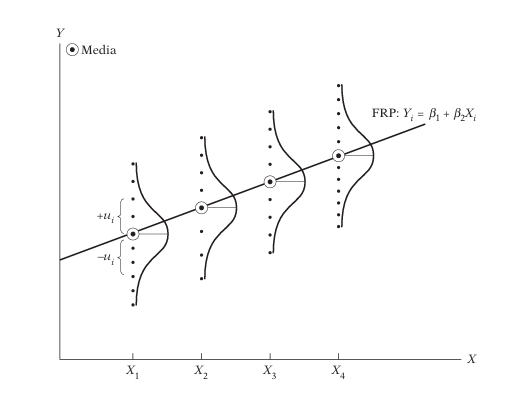

*fuente: Gujarati, D. & Porter, D. (2010) Econometria Básica (5ta Ed.) McGraw-Hill, p.63*



Dado que cada observación sigue una distribución normal  y las perturbaciones son independientes, la función de densidad conjunta (verosimilitud) es el producto de todas las densidades individuales:

$$L(\beta_0, \beta_1, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2}\right)$$

y la log-likelihood:

$$
\ell(\beta_0, \beta_1, \sigma^2) = - \frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} \left(y_i - \beta_0 - \beta_1 x_i\right)^2
$$

$$
\ell(\beta_0, \beta_1, \sigma^2) = - \frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} SCR
$$


Para encontrar los estimadores de máxima verosimilitud, tomamos las derivadas parciales de la log-likelihood con respecto a $\beta_0$, $\beta_1$ y $\sigma^2$, y las igualamos a cero. Notamos:

* $ℓ(β_0,β_1,σ^2)$ es una transformación monótona decreciente de SCR.

$$\underset{\beta_0, \beta_1}{\text{argmin}}SCR = \underset{\beta_0, \beta_1}{\text{argmax}}ℓ(β_0,β_1,σ^2)$$

* $\frac{\partial\ell}{\partial\sigma^2} = 0$:

$$ \frac{\partial\ell}{\partial\sigma^2}=-\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}SCR = 0
$$

$$ \hat\sigma^2 = \frac{SCR}{n}$$





Fíjense que $\hat\beta_0$ y $\hat\beta_1$ son funciones de $Y$ y, por lo tanto, **son variables aleatorias**.


Específicamente, se puede mostrar que
$$
\mathbb{E}(\boldsymbol{\beta} \mid \mathbf{x}) = \begin{pmatrix}
\beta_0 \\
\beta_1 \end{pmatrix}
$$

$$
\mathbb{V} (\boldsymbol{\beta} \mid \mathbf{x}) = \frac{\sigma^2}{S_{xx}}  \begin{pmatrix} \bar{x^2_n} & -\bar{x}_n \\ -\bar{x}_n & 1 \end{pmatrix} $$


# Práctica 3
## Ejercicio 3

Consideremos la función $f: \mathbb{R} \to \mathbb{R}$ dada por $f(x)= 2x - 1$.

Sean $X\sim U(0,1)$, $\varepsilon \sim \mathcal{N}(0, .25)$ y $Y:= f(X) + \varepsilon$

1. Fijemos $n = 100$. Tomar muestras $x_1,\ldots,x_{n}$ de $X$ y $\varepsilon_1,\ldots,\varepsilon_n$ de $\varepsilon$ y
  calcular $y_i = f(x_i) + \varepsilon_i$, con $1\leq i \leq n$. Realizar un ajuste lineal
  de la forma $Y = X\beta_1 + \beta_0 + \epsilon$ a partir de los samples
  $(x_1,y_1),\ldots,(x_n,y_n)$ generados. Hacer un diagrama de dispersión de los samples y la estimación del modelo de regresión lineal

2. Repetir el paso anterior $m=10000$ veces para obtener $m$ pares de coeficientes $\hat\beta_0$ y $\hat\beta_1$, es decir, $m$ samples de $\hat\beta_0$ y $m$ samples de $\hat\beta_1$.  
   1. Visualizar la distribución de cada $\hat\beta$ haciendo un histograma,  
   2. La distribución conjunta haciendo un diagrama de dispersión.  
   3. Graficar las rectas de regresión estimadas  

3. Repetir el paso anterior para $m=30$ desde $n=10$ hasta $n = 1000$. Graficar la media y la varianza muestral de las $m$ estimaciones de cada coeficiente $\hat\beta$ en función de $n$.


In [29]:
from scipy.stats import uniform, norm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Ejercicio 3.1.

# Fijar parámetros
n = 100


true_betas = [-1, 2]
sigma = np.sqrt(.25)

# Definir f(x)
def f(x):
    return true_betas[0] + true_betas[1]*x


# Generar Variables Aleatorias
X = uniform.rvs(size=n)
epsilon = norm.rvs(loc=0, scale=sigma, size=n)

Y = f(X) + epsilon


# Crear estimadores del Modelo de Regresión Lineal Simple
def simple_linear_regression(x, y):
    """
    Estima un modelo de regresión lineal simple (MRLS) utilizando mínimos cuadrados ordinarios.

    Parámetros:
    - x: array de valores independientes.
    - y: array de valores dependientes.

    Devuelve:
    - beta_0: intercepto estimado.
    - beta_1: pendiente estimada.
    """
    # Calcular las medias de x e y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcular el numerador y denominador para beta_1 (pendiente)
    numerador = np.sum((x - x_mean) * (y - y_mean))
    denominador = np.sum((x - x_mean)**2)

    # Estimación de beta_1 (pendiente)
    beta_1 = numerador / denominador

    # Estimación de beta_0 (intercepto)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1



# Estimar el MRLS
beta_0, beta_1 = simple_linear_regression(X, Y)

# Imprimir los estimadores
print("Estimador de beta_0:", beta_0)
print("Estimador de beta_1:", beta_1)

Estimador de beta_0: -0.9067832451426865
Estimador de beta_1: 1.9775900926833943


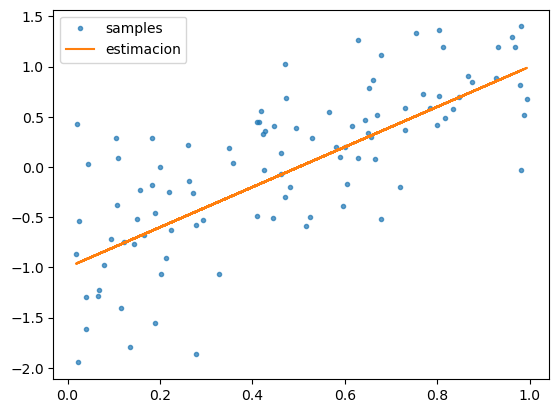

In [31]:
# Plotear samples y estimación

fig, ax = plt.subplots()
ax.plot(X, Y, '.', alpha=.7, label='samples')
ax.plot(X, f(X), label='estimacion')

plt.legend()
plt.show()

In [32]:
# 3.2.1

# Definir número de iteraciones
m = 1_000

# Instanciar lista para guardar resultados de estimaciones
estimates = []

# Iterar
for i in range(m):
  epsilon = norm.rvs(loc=0, scale=sigma, size=n)
  Y = f(X) + epsilon
  beta_0, beta_1 = simple_linear_regression(X, Y)
  estimates.append((beta_0, beta_1))

# Convertir a numpy.array
estimates = np.array(estimates)

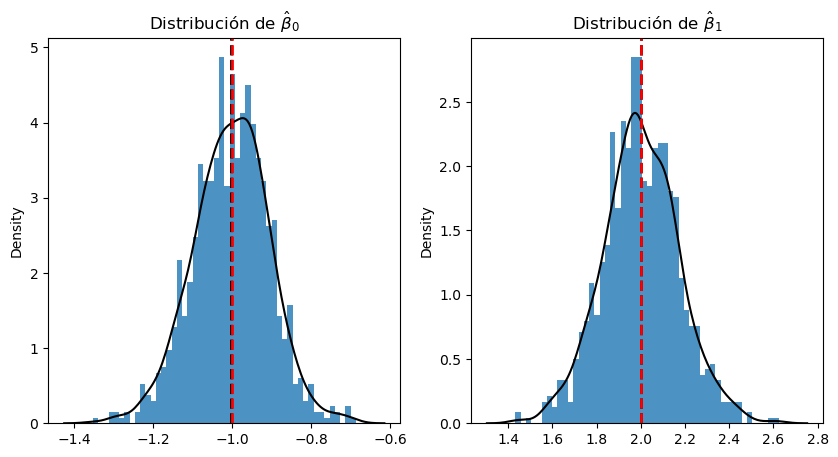

In [33]:
# 3.2.2

# Plotear
bins = 50

fig, axs  = plt.subplots(1,len(true_betas), figsize=(10,5))
axs = axs.flatten()
for param in range(len(true_betas)):
    # Plotear histograma y estimación
    axs[param].hist(estimates[:,param], density=True, alpha=.8, bins = bins)
    sns.kdeplot(estimates[:,param], ax=axs[param], color='k')
    axs[param].axvline(x=estimates[:,param].mean(), color='k', linestyle='--', linewidth=2)
    axs[param].axvline(x=true_betas[param], color='r', linestyle='--', linewidth=2)
    axs[param].set_title(f'Distribución de $\\hat\\beta_{param}$')

plt.show()

In [34]:
for param in range(len(true_betas)):
    print(f'True beta_{param}:', true_betas[param])
    print(f'Estimated beta_{param}:', estimates[:,param].mean().round(4))
    print('-'*50)

True beta_0: -1
Estimated beta_0: -1.0027
--------------------------------------------------
True beta_1: 2
Estimated beta_1: 2.0002
--------------------------------------------------


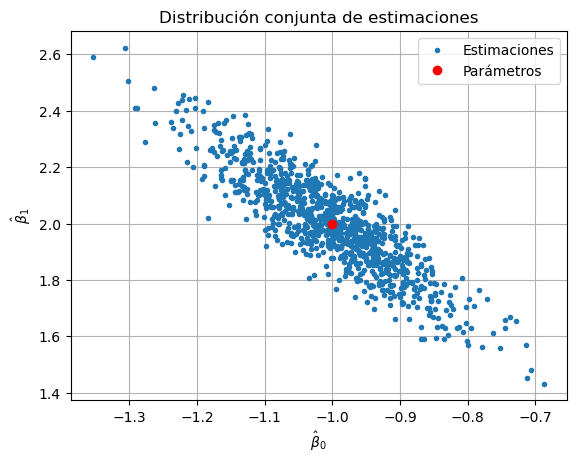

In [35]:
# 3.2.3 Visualizar la distribución conjunta haciendo un diagrama de dispersión

fig, ax = plt.subplots()

# Graficar rectas estimadas
ax.plot(estimates[:,0],estimates[:,1], '.', label = 'Estimaciones')
ax.plot(true_betas[0],true_betas[1], 'ro', label='Parámetros')

plt.title('Distribución conjunta de estimaciones')
plt.xlabel('$\\hat\\beta_0$')
plt.ylabel('$\\hat\\beta_1$')
plt.legend()
plt.grid(True)
plt.show()

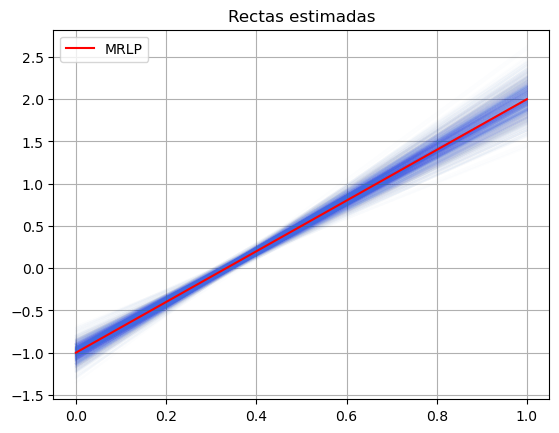

In [36]:
# 3.2.4 Graficar rectas estimadas y el modelo poblacional
fig, ax = plt.subplots()

# Graficar rectas estimadas
ax.plot(estimates.T, color = 'royalblue', alpha = .01)

# Graficar modelo poblacional
ax.plot(true_betas, color = 'r', label = 'MRLP')

plt.title('Rectas estimadas')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# 3.2.3 Repetir el paso anterior para $m=30$ desde $n=10$ hasta $n = 1000$. 
# Graficar la media y la varianza muestral de las $m$ estimaciones de cada coeficiente $\hat\beta$ en función de $n$.

m = 30
ns = range(10, 1_001)

# Instanciar listas para guardar estadísticos
sample_means = []
sample_variances = []
conditional_population_variances = []

# Generar samples del regresor
X = uniform.rvs(size=ns[-1])

# Iterar para cada tamaño de muestra
for n in ns:

  estimates = []

  # Filtrar la cantidad de samples necesaria
  X_sample = X[:n]

  # Realizar m estimaciones
  for i in range(m):

    # Simular variables
    epsilon = norm.rvs(loc=0, scale=sigma, size=n)
    Y_sample = f(X_sample) + epsilon

    # Estimar
    beta_0, beta_1 = simple_linear_regression(X_sample, Y_sample)
    estimates.append((beta_0, beta_1))

  # Calcular promedio y varianza muestral de las estimaciones
  estimates_mean = np.mean(estimates, axis=0)
  estimates_var = np.var(estimates, axis=0)

  # Agregar a los resultados
  sample_means.append(estimates_mean)
  sample_variances.append(estimates_var)

  # Calcular varianza condicional teórica
  sxx = np.sum((X_sample - np.mean(X_sample))**2)
  x2bar = np.mean(X_sample**2)

  a11 = sigma**2 * x2bar / sxx
  a22 = sigma**2 / sxx

  conditional_population_variances.append((a11, a22))


# Convertir en np.array
sample_means = np.array(sample_means)
sample_variances = np.array(sample_variances)
conditional_population_variances = np.array(conditional_population_variances)

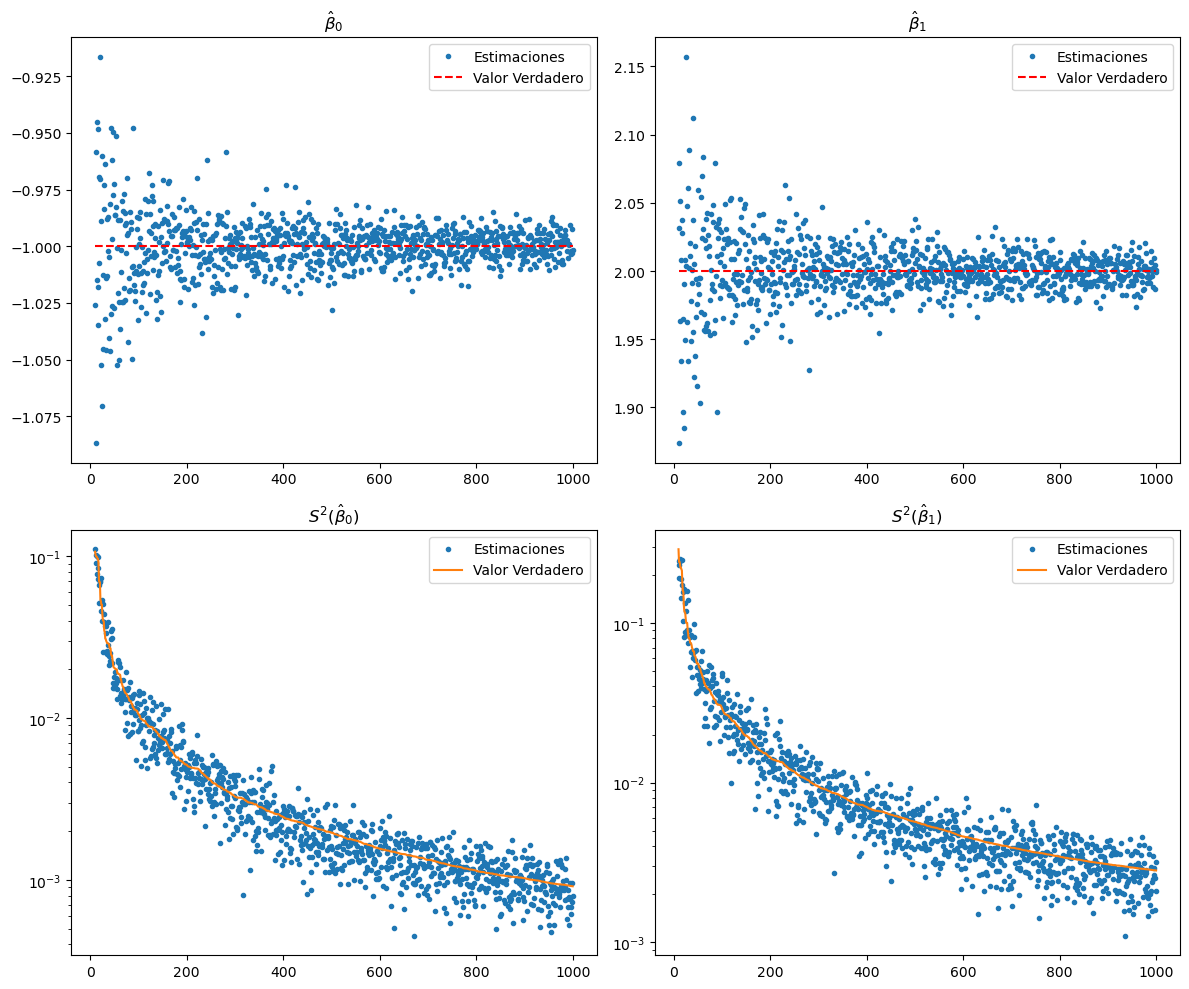

In [38]:
# Crear el gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de las medias de las estimaciones para beta_0
axs[0, 0].plot(ns, sample_means[:, 0], '.', label='Estimaciones')
axs[0, 0].hlines(true_betas[0], xmin=ns[0], xmax=ns[-1], colors='r', linestyles='--', label='Valor Verdadero')
axs[0, 0].set_title(r'$\hat{\beta}_0$')
axs[0, 0].legend()

# Gráfico de las medias de las estimaciones para beta_1
axs[0, 1].plot(ns, sample_means[:, 1], '.', label='Estimaciones')
axs[0, 1].hlines(true_betas[1], xmin=ns[0], xmax=ns[-1], colors='r', linestyles='--', label='Valor Verdadero')
axs[0, 1].set_title(r'$\hat{\beta}_1$')
axs[0, 1].legend()

# Gráfico de la varianza (muestral) de las estimaciones para beta_0
axs[1, 0].plot(ns, sample_variances[:, 0], '.', label='Estimaciones')
axs[1, 0].plot(ns, conditional_population_variances[:, 0], label='Valor Verdadero')
axs[1, 0].set_title(r'$S^2(\hat{\beta}_0)$')
axs[1, 0].legend()
axs[1, 0].set_yscale('log')

# Gráfico de la varianza (muestral) de las estimaciones para beta_1
axs[1, 1].plot(ns, sample_variances[:, 1], '.', label='Estimaciones')
axs[1, 1].plot(ns, conditional_population_variances[:, 1], label='Valor Verdadero')
axs[1, 1].set_title(r'$S^2(\hat{\beta}_1)$')
axs[1, 1].legend()
axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

## Bondad de Ajuste 

Muchas veces, además de estimar un modelo, nos interesa saber "qué tan buena" es una estimación. A esta clase de métricas se las conoce como medidad de la *bondad de ajuste* de un modelo.  

### El coeficiente de determinación $R^2$
Una de las métricas más utilizadas para evaluar la calidad del ajuste de un modelo es el *coeficiente de determinación* $R^2$.

El $R^2$ se define de la siguiente manera:

$$
R^2 = 1 - \frac{SCR}{SCT}
$$

Donde $SCT$ es la suma de cuadrados total (TSS) y mide la variabilidad total de la variable dependiente $Y$ con respecto a su media:  
$SCT = \sum_{i=1}^{n}  {(y_i - \bar y)^2} =S_{yy}$


### Descoposición de la varianza

El punto clave detrás del $R^2$ es la descomposición de la varianza en un modelo de regresión lineal:

$$SCT=SCE+SCR$$
Donde $SCE$ es la suma de cuadrados explicada (ESS) y mide la variabilidad total de la variable dependiente $Y$ que puede ser explicada por el modelo de regresión:
$SCT = \sum_{i=1}^{n}  {(\hat{y}_i - \bar y)^2}$

La expresión $SCT = SCE + SCR$ puede interpretarse entonces como sigue:
> La variabilidad total $SCT$ puede descoponerse en una parte que es explicada por el modelo, $SCE$, y una parte que queda sin explicar,$SCR$


Y el coeficiente de terminación puede expresarse entonces como

$$R^2 = \frac{SCE}{SCT}$$


⚠️ Para que $SCT=SCE+SCR$ se verifique es **fundamental** que el modelo tenga un intercepto $\beta_0$. Cuando un modelo no tiene intercepto la descomposición $SCT=SCE+SCR$


#### Propiedades del $R^2$

En un modelo con intercepto,

1. El $R^2$ siempre toma valores entre 0 y 1
2. Agregar variables al modelo nunca reduce el $R^2$ (*overfitting*)

En un modelo sin intercepto,
1. El $R^2$ puede ser negativo (pero no mayor que 1)

**Alternativas**: $R^2$ajustado $AIC, BIC, HQ$


### Pregunta 2: ¿cuál es la interpretación del $R^2$ ?

## Ejercicio
Consideremos la función $f: \mathbb{R} \to \mathbb{R}$ dada por $f(x)= 2x + 10x$.

Sean $X\sim U(0,1)$, $\varepsilon \sim \mathcal{N}(0, .25)$ y $Y:= f(X) + \varepsilon$

1. Fijemos $n = 100$. Tomar muestras $x_1,\ldots,x_{n}$ de $X$ y $\varepsilon_1,\ldots,\varepsilon_n$ de $\varepsilon$ y
  calcular $y_i = f(x_i) + \varepsilon_i$, con $1\leq i \leq n$. 
1. Realizar un ajuste lineal de la forma $Y = X\beta_1 + \beta_0 + \epsilon$ a partir de los samples y calcular el $R^2$
2. Realizar un ajuste lineal de la forma $Y = X\beta_1 + \epsilon$ a partir de los samples y calcular el $R^2$

----
Derivación de estimadores MCO en modelos sin intercepto:

$$Y = \beta X + \epsilon $$

Entonces

$$SCR = \sum_{i=1}^{n} (y_i - \hat{\beta} x_i)^2 $$

Derivando e igualando a cero,  
$$\frac{d SCR}{d \hat\beta_0}= -2 \sum_{i=1}^{n} (y_i - \hat\beta_1 x_i) = 0  $$

$$\sum_{i=1}^{n} y_i = \hat\beta_1 \sum_{i=1}^{n} x_i $$

Despejando  
$$\beta = \frac{\bar y}{\bar x} $$

---


In [39]:
def r2_score(y_true, y_pred):
    y_mean = y_true.mean()
    SCT = np.sum((y_true - y_mean)**2)
    SCR = np.sum((y_true - y_pred)**2)
    return 1 - SCR/SCT

def f(x):
    return true_betas[0] + true_betas[1]*x

def beta_no_intercept(y, x):
    return y.mean()/x.mean()

########## Generación datos sintéticos
# Código del ejercicio 2
n = 100
true_betas = [10, 2]
sigma = np.sqrt(.25)
X = uniform.rvs(size=n)
epsilon = norm.rvs(loc=0, scale=sigma, size=n)
Y = f(X) + epsilon

########## Estimaciones
# Modelo con intercepto
beta_0, beta_1 = simple_linear_regression(X, Y)

# Modelo sin intercepto
beta = beta_no_intercept(Y, X)

# Predicciones
y_pred_con = beta_0 + beta_1*X
y_pred_sin = beta*X

# Calcular R2
r2_con = r2_score(Y, y_pred_con)
r2_sin = r2_score(Y, y_pred_sin)

# Imprimir resultados
print("Modelo con intercepto:")
print(f"beta_0: {beta_0}, beta_1: {beta_1}")
print(f"R2: {r2_con}")
print("-"*50)
print("Modelo sin intercepto:")
print(f"beta: {beta}")
print(f"R2: {r2_sin}")

Modelo con intercepto:
beta_0: 10.129738122513753, beta_1: 1.8687591916310557
R2: 0.4643004984372021
--------------------------------------------------
Modelo sin intercepto:
beta: 21.508689597754447
R2: -50.818573434077734
